<a href="https://colab.research.google.com/github/babarushmani/Python-Data-Sructure/blob/main/MLP_MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Things to cover in upciming sessions** <br>1 - Pytorch Tutorial<br>
2 - Optimizer Gradient Descent.<br>
3 - CNN and LSTM <br>
4 - Well knowned Architectures ResNet, VGG, Alexnet.<br>
5 - Customized Dataset and Loader<br>
6 - Project.<br>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

## Prepare Dataset

In [ ]:
Transform = transforms.ToTensor()
train_data = datasets.MNIST(root='/data', train=True, download=True, transform=Transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15417232.02it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 465616.40it/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4278529.07it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 12149571.92it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



## Visualise the dataset

Label : 1 


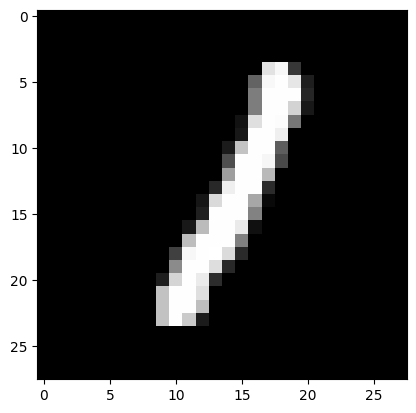

In [ ]:
img, label = train_data[345]  #train_data -> [(img1, label1), (img2, label2) ... ]
print('Label : {} '.format(label))
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [ ]:
test_data = datasets.MNIST(root='/data', train=False, download=True, transform=Transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

## Defining our MLP model

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size=784, output_size=10):
    super(MultilayerPerceptron, self).__init__()
    self.d1 = nn.Linear(input_size, 128)
    self.d2 = nn.Linear(128, 64)
    self.d3 = nn.Linear(64, output_size)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)
  def forward(self, x):
    x = x.view(x.size(0), -1) #Flattening of image, x -> [784,1]
    x = self.relu(self.d1(x)) # x -> [128, 1]
    x = self.relu(self.d2(x)) # x -> [64, 1]
    x = self.d3(x)   #will get vector of size 10  # x -> [10, 1]
    x = self.softmax(x)
    return x

In [ ]:
model = MultilayerPerceptron()
print(model)

MultilayerPerceptron(
  (d1): Linear(in_features=784, out_features=128, bias=True)
  (d2): Linear(in_features=128, out_features=64, bias=True)
  (d3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


## Defining Loss and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss() #Will cover in details in next class
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

## Training Loop

In [ ]:

#Defining Training Loop
epochs = 10
for i in range(epochs):
  train_losses = []
  train_correct = []
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs, 1)
    train_correct.append((preds == labels).sum().item()) #Counting number of correct predictions

    loss.backward()
    optimizer.step()

  train_losses.append(loss.item())
  train_accuracy = np.sum(train_correct)/60000
  print(f'Epoch {i+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}')



Epoch 1/10, Train Loss: 1.6348, Train Accuracy: 0.6756
Epoch 2/10, Train Loss: 1.6154, Train Accuracy: 0.8933
Epoch 3/10, Train Loss: 1.5852, Train Accuracy: 0.9114
Epoch 4/10, Train Loss: 1.5882, Train Accuracy: 0.9193
Epoch 5/10, Train Loss: 1.4861, Train Accuracy: 0.9252
Epoch 6/10, Train Loss: 1.5860, Train Accuracy: 0.9294
Epoch 7/10, Train Loss: 1.5991, Train Accuracy: 0.9331
Epoch 8/10, Train Loss: 1.5257, Train Accuracy: 0.9367
Epoch 9/10, Train Loss: 1.5537, Train Accuracy: 0.9385
Epoch 10/10, Train Loss: 1.5170, Train Accuracy: 0.9420


## Testing on trained model

In [ ]:
with torch.no_grad():
    test_losses = []
    test_correct = []
    for images, labels in test_loader:
      outputs = model(images)
      _, preds = torch.max(outputs, 1)
      test_correct.append((preds == labels).sum().item())
    test_accuracy = np.sum(test_correct)/10000

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9396


## Inference on Data

Label : 9    Prediction : 9


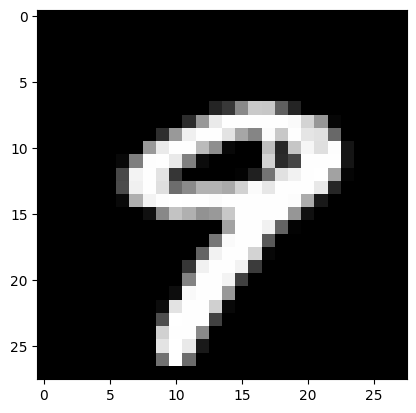

In [ ]:
img, label = test_data[9]
output = model(img.unsqueeze(0))
_, pred = torch.max(output, 1)
print('Label : {}    Prediction : {}'.format(label, pred.item()))
plt.imshow(img.squeeze(), cmap='gray')
plt.show()